## Initial Data Exploration of Philly Rising Boundaries Geojson Files
In a change of pace, I chose to explore and plot a program that offers services and aid to communities in need. By studying the locations of these efforts I am hoping to recognize areas that still need attention in comparison with those that are being serviced by this incredible program.

 ### Philly Rising focuses on areas with chronic quality of life concerns and works with residents and community groups to address neighborhood issues.
http://www.mayorsfundphila.org/initiatives/phillyrising-mural-arts/
     
 * https://www.opendataphilly.org/dataset/philly-rising-boundaries
 

## PhillyRising Collaborative 
### http://www.mayorsfundphila.org/initiatives/phillyrising-mural-arts/
#### "The City of Philadelphia's new way of doing business"
The PhillyRising Collaborative targets neighborhoods throughout Philadelphia that are plagued by chronic crime and quality of life concerns, and establishes partnerships with community members to address these issues. The PhillyRising Team coordinates the actions of City agencies to help neighborhoods realize their vision for their community through sustainable, responsive, and cost-effective solutions. Together, residents and the City government can keep Philly rising!

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
prb_gdf = gpd.read_file('../data/PhillyRising_Boundaries.geojson')

In [4]:
prb_gdf.shape

(19, 13)

There are 19 rows and 13 columns

In [5]:
prb_gdf.columns

Index(['OBJECTID_12', 'OBJECTID_1', 'ID', 'DIVISION', 'DISTRICT', 'BOUNDARIES',
       'DESIGNATED', 'SITE_NAME', 'DISTRICT_2', 'CATEGORY', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')

In [6]:
prb_gdf.head()

,OBJECTID_12,OBJECTID_1,ID,DIVISION,DISTRICT,BOUNDARIES,DESIGNATED,SITE_NAME,DISTRICT_2,CATEGORY,Shape__Area,Shape__Length,geometry
0,1,1,0,Central,6th,10th to Broad/Arch to Chestnut/Convention Center,Y,Market East,6th,Active PhillyRising Neighborhood,4.543398e+06,10106.416772,"POLYGON ((-75.16269 39.95624, -75.16327 39.953..."
1,2,2,1,SouthWest,19th,62nd to 67th/Arch to Girard,Y,Haddington,19th,Active PhillyRising Neighborhood,4.333346e+06,10171.137092,"POLYGON ((-75.24311 39.97011, -75.25313 39.971..."
2,3,3,2,East,26th,10th to 6th/York to Lehigh,Y,Hartranft,26th,Active PhillyRising Neighborhood,2.696828e+06,6592.812307,"POLYGON ((-75.14789 39.99309, -75.14827 39.991..."
3,4,4,3,NorthEast,15th,Dyre to Margaret/Duffield to Leiper,Y,Frankford,15th,Active PhillyRising Neighborhood,3.952056e+06,8154.176620,"POLYGON ((-75.08172 40.02266, -75.08246 40.023..."
4,5,5,5,Central,22nd,Lehigh to Dauphin/28th to 33rd,Y,Strawberry Mansion,22nd,Active PhillyRising Neighborhood,5.150674e+06,9091.679486,"POLYGON ((-75.18503 39.99789, -75.18637 39.991..."


In [7]:
prb_gdf['geometry']

0     POLYGON ((-75.16269 39.95624, -75.16327 39.953...
1     POLYGON ((-75.24311 39.97011, -75.25313 39.971...
2     POLYGON ((-75.14789 39.99309, -75.14827 39.991...
3     POLYGON ((-75.08172 40.02266, -75.08246 40.023...
4     POLYGON ((-75.18503 39.99789, -75.18637 39.991...
5     POLYGON ((-75.16958 39.98642, -75.17755 39.987...
6     POLYGON ((-75.15684 39.92898, -75.15900 39.919...
7     POLYGON ((-75.23379 39.93804, -75.23390 39.937...
8     POLYGON ((-75.23312 39.92457, -75.24022 39.919...
9     POLYGON ((-75.12473 40.00113, -75.12664 39.992...
10    POLYGON ((-75.10408 40.04673, -75.10493 40.045...
11    POLYGON ((-75.17452 40.00123, -75.17554 39.996...
12    POLYGON ((-75.17581 39.93396, -75.17931 39.934...
13    POLYGON ((-75.15082 39.99347, -75.15239 39.993...
14    POLYGON ((-75.12538 39.99805, -75.12506 39.999...
15    POLYGON ((-75.16539 39.94365, -75.16542 39.943...
16    POLYGON ((-75.16774 40.03153, -75.16853 40.031...
17    POLYGON ((-75.23693 39.91681, -75.23743 39

Below I attempt to graph the Philly Rising Boundaries regions, which without a base-map makes little to no sense.

In [8]:
prb_gdf.plot(figsize=(10,10), color='white', edgecolor='gray')

<AxesSubplot:>

I chose to plot these geolocations by the "division" category, which was not helpful without a base-map of Philadelphia for context, as it is very hard to visualize an entire city without the boundaries in front of you.

<AxesSubplot:>

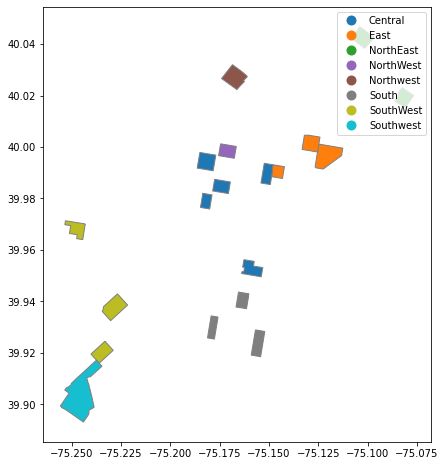

In [9]:

prb_gdf.plot(figsize=(8,8), edgecolor='gray', column='DIVISION', legend=True)

In [10]:
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')

Overlaying the PhillyRising Boundaries onto a map of Philadelphia puts their locations and what the Mayor deems as "at risk communities" into conversation with one another. It is important top note that the regions are not specific as there are two different "NorthWest" regions and two different "SouthWest" regions. This leads me to believe the cut offs when determining regions were loose, and that the title is not what is important, but the size and physical location.

<AxesSubplot:>

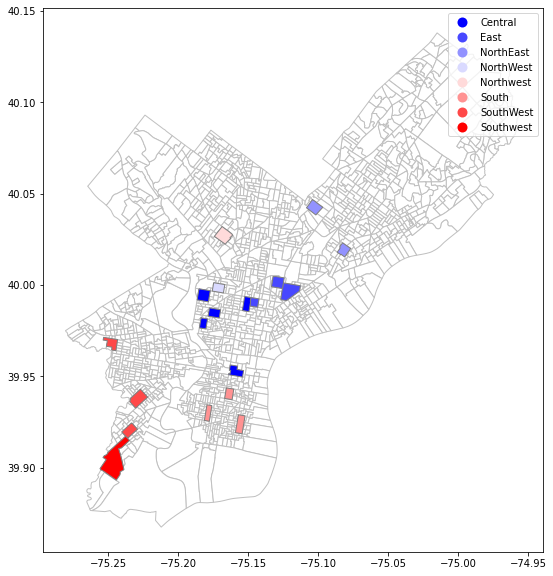

In [11]:
base=base_ward_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))
prb_gdf.plot(ax=base, edgecolor='gray', 
            column='DIVISION',
            categorical=True,
            legend=True, cmap='bwr', marker='x', markersize=10)

In [12]:
accscore_gdf = gpd.read_file('../data/processed_data/accessible_score_by_neighborhood.geojson')

In order to clarify my graph and have no duplicate categories, I created a dictionary for the geography division values and mapped "SouthWest" together and "NorthWest" together for a clear viewing of my data.

In [24]:
# I created a mapping dictionary for DIVISION values

dist_map = {'Northwest': 'NorthWest',
            'Southwest': 'SouthWest',
            'Central': 'Central', 
            'SouthWest': 'SouthWest', 
            'East': 'East', 
            'NorthEast': 'NorthEast', 
            'South': 'South', 
            'NorthWest': 'NorthWest'  
           }

prb_gdf['DIVISION']=prb_gdf['DIVISION'].map(dist_map)

In [23]:
prb_gdf.to_file('../data/PhillyRising_Boundaries.geojson', driver='GeoJSON')

<AxesSubplot:>

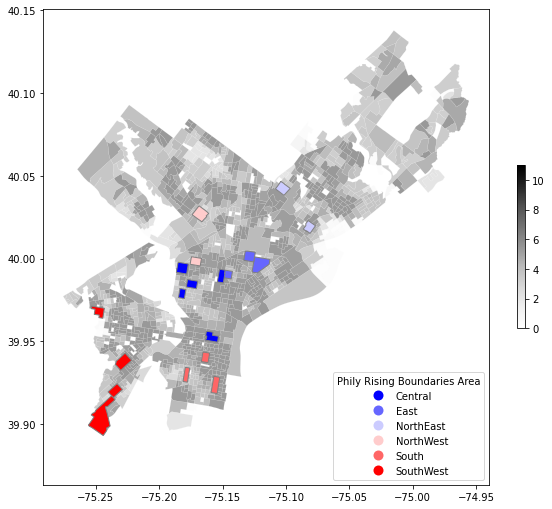

In [22]:
base = accscore_gdf.dropna().plot(figsize=(10,10), edgecolor='white', linewidth=0.3, column='combined_score', 
                categorical=False, legend=True, cmap='Greys', 
                                  alpha=0.4,
                                  legend_kwds={'shrink': 0.3}) 

prb_gdf.plot(ax=base, edgecolor='gray', 
            column='DIVISION',
            categorical=True,
            legend=True, cmap='bwr', marker='x', markersize=10,
            legend_kwds={'title': 'Phily Rising Boundaries Area', 
                         'loc':'lower right'
                        }
           )



The map above shows the PhillyRising Program as Boundaries in different areas of Philadelphia where the program has been implemented. I noticed that there are more programs in Central and Southwest Philadelphia which is cause for concern in my research because I have found that much of NorthEast and Northern Philadelphia are areas with low accessibility score and lack of programs in place to counteract those inequalities.